In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Install kagglehub package
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("badatthis/ecg-classification-dataset")
print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.


100%|██████████| 98.8M/98.8M [00:22<00:00, 4.71MB/s]

Extracting files...


Path to dataset files: C:\Users\aayus\.cache\kagglehub\datasets\badatthis\ecg-classification-dataset\versions\1


In [2]:
import pandas as pd
train_df = pd.read_csv(r'C:\Users\aayus\OneDrive\Desktop\ECG Classcification\data\mitbih_train.csv')
test_df=pd.read_csv(r'C:\Users\aayus\OneDrive\Desktop\ECG Classcification\data\mitbih_test.csv')
normal_df=pd.read_csv(r'C:\Users\aayus\OneDrive\Desktop\ECG Classcification\data\ptbdb_normal.csv',)


In [3]:
train_df.columns = range(train_df.shape[1])
test_df.columns = range(test_df.shape[1])

train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)
print(len(normal_df.columns))  

187
0    72470
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64
188


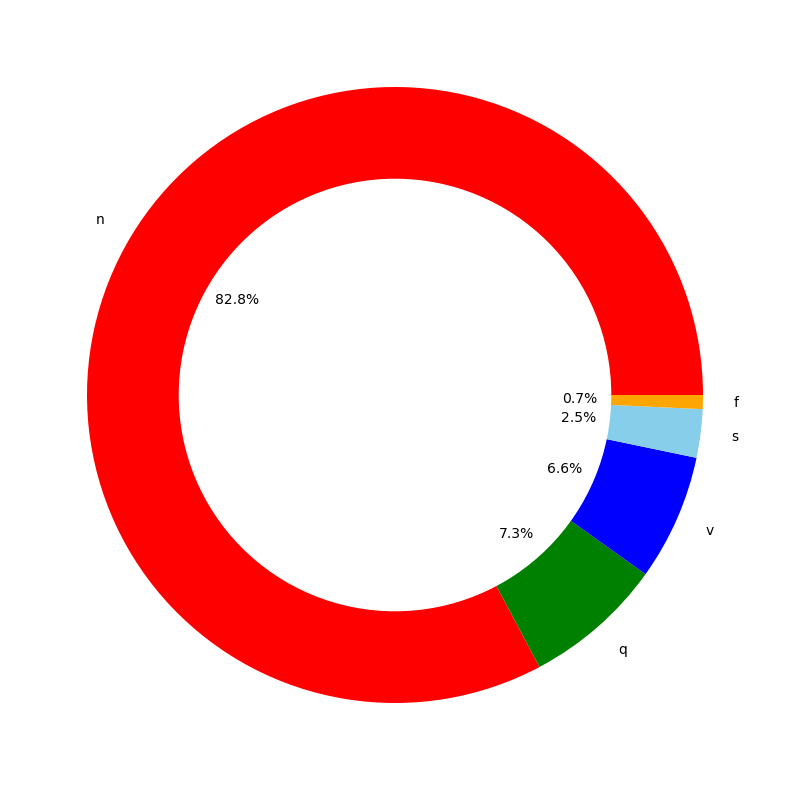

In [4]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [5]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [6]:
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


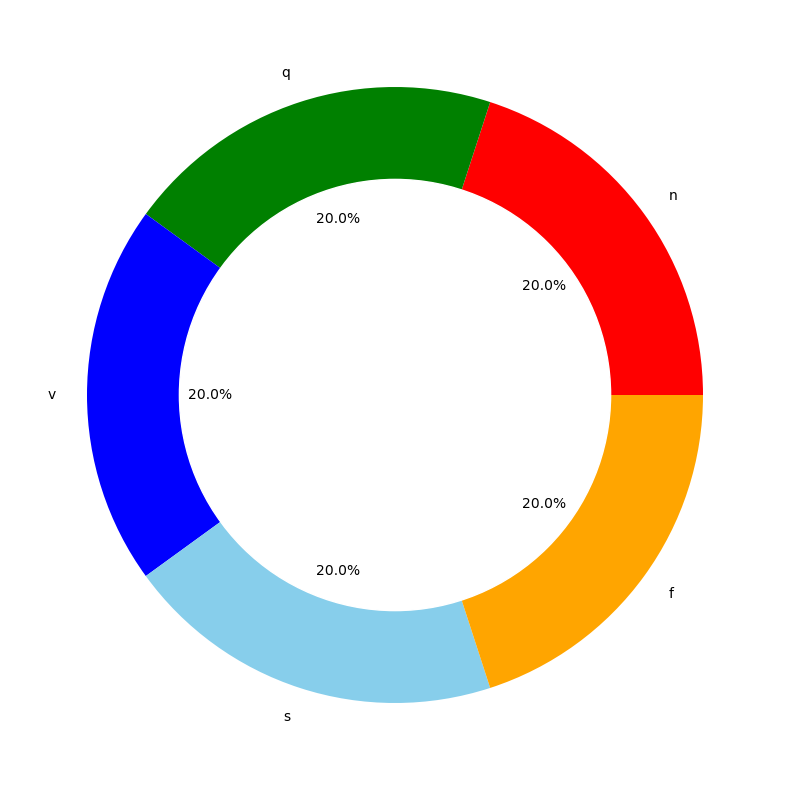

In [7]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [8]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [9]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
12381,0.986408,0.720388,0.000000,0.071845,0.058252,0.095146,0.135922,0.149515,0.143689,0.153398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73061,0.987124,0.978541,0.313305,0.000000,0.072961,0.150215,0.120172,0.158798,0.248927,0.206009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76349,0.000000,0.018550,0.082631,0.165261,0.288364,0.403035,0.441821,0.505902,0.536256,0.578415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80566,1.000000,0.887887,0.588918,0.247423,0.082474,0.099227,0.087629,0.069588,0.056701,0.052835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
83229,0.794613,0.609428,0.582492,0.545455,0.525253,0.474747,0.427609,0.380471,0.323232,0.252525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


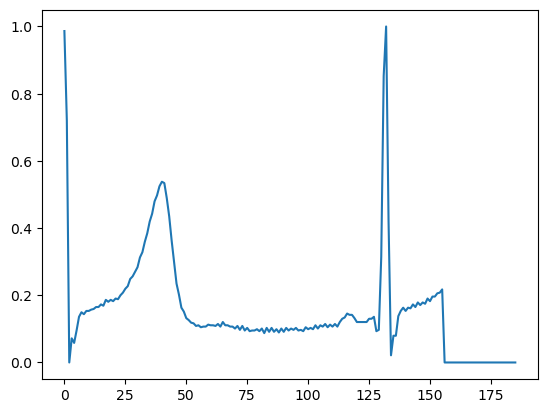

In [10]:
plt.plot(c.iloc[0,:186])

In [11]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


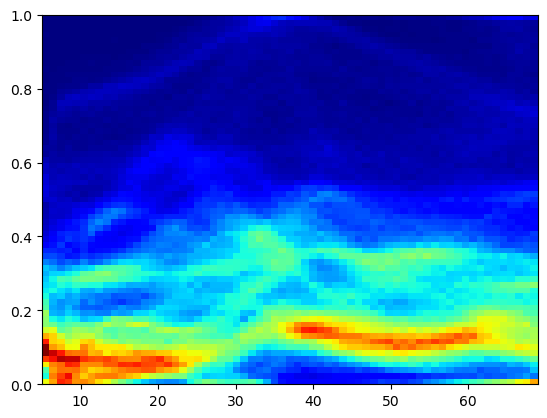

In [12]:
plot_hist(0,70,5,65)

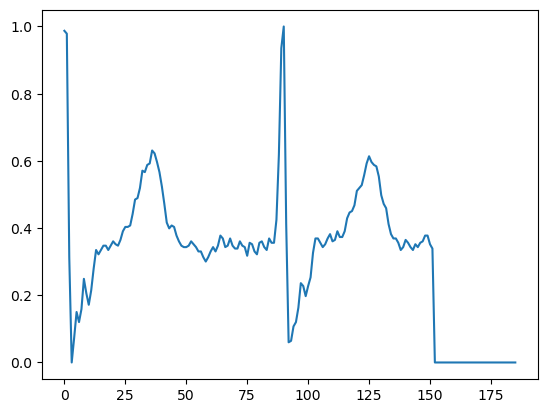

In [13]:
plt.plot(c.iloc[1,:186])

900000
900000


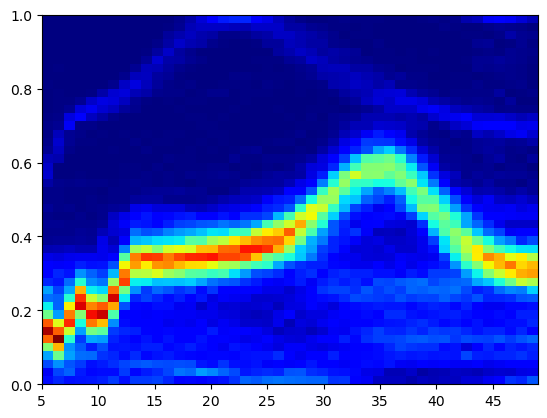

In [14]:
plot_hist(1,50,5,45)

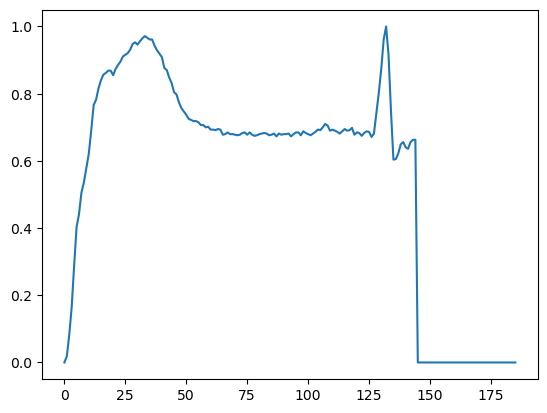

In [15]:
plt.plot(c.iloc[2,:186])

900000
900000


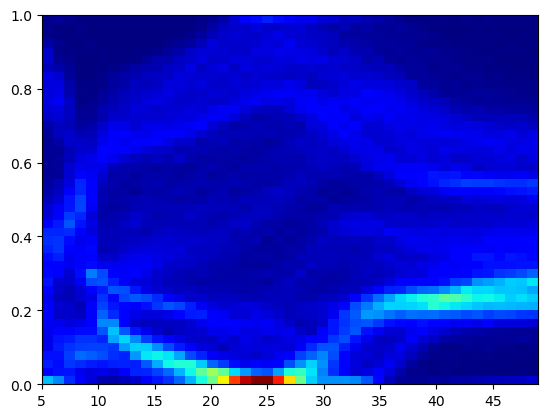

In [16]:
plot_hist(2,50,5,45)

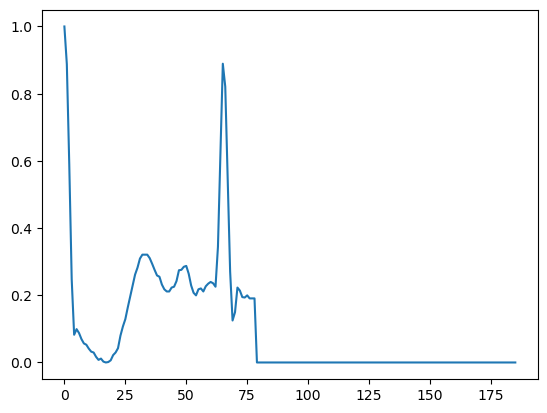

In [17]:
plt.plot(c.iloc[3,:186])

900000
900000


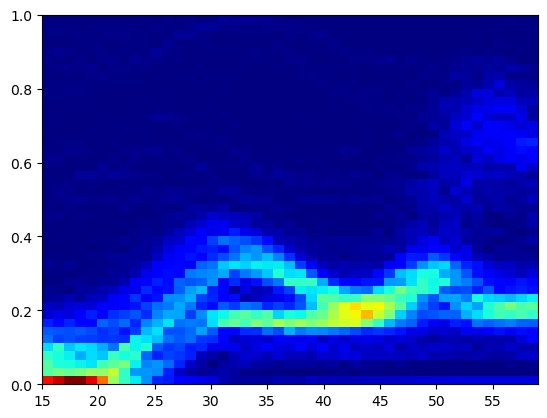

In [18]:
plot_hist(3,60,15,45)

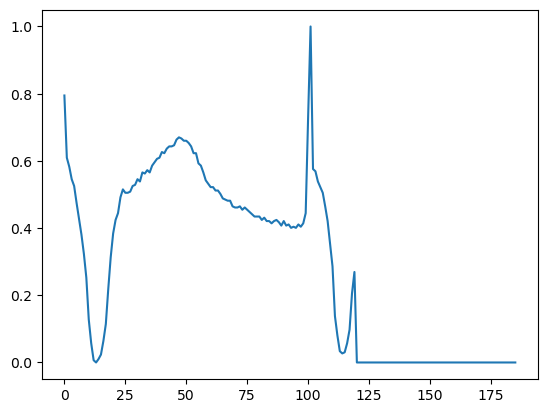

In [19]:
plt.plot(c.iloc[4,:186])

700000
700000


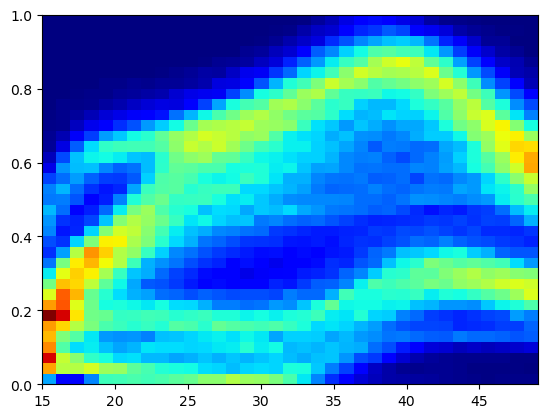

In [20]:
plot_hist(4,50,15,35)

In [21]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

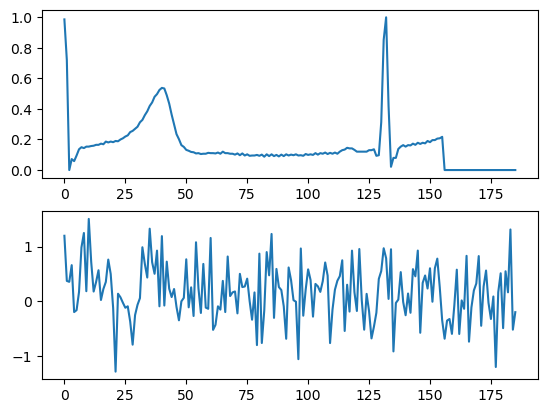

In [22]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [23]:
target_train = train_df[187]
target_test = test_df[187]

y_train = to_categorical(target_train)
y_test = to_categorical(target_test)


In [24]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
from sympy import convolution


def network(X_train,y_train,X_test,y_test):
    
    im_shape=(X_train.shape[1],1)
    inputs_cnn=input(shape=(im_shape), name='inputs_cnn')
    conv1_1=convolution(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1) # type: ignore
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1) # type: ignore
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1) # type: ignore
    conv2_1=BatchNormalization()(conv2_1) # type: ignore
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1) # type: ignore
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2) # type: ignore
    conv3_1=BatchNormalization()(conv3_1) # type: ignore
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1) # type: ignore
    flatten=Flatten()(pool3) # type: ignore
    dense_end1 = Dense(64, activation='relu')(flatten) # type: ignore
    dense_end2 = Dense(32, activation='relu')(dense_end1) # type: ignore
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2) # type: ignore
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output) # type: ignore
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8), # type: ignore
             ModelCheckpoint(filepath='ecg_classification.h5', monitor='val_loss', save_best_only=True)] # type: ignore

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('ecg_classification.h5')
    return(model,history)

In [26]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [27]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

def network(X_train, y_train, X_test, y_test):
    # Input layer
    input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # Convolutional layer
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)

    # Additional convolutional layer
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)

    # Flattening layer
    x = Flatten()(x)

    # Dense layers with Dropout
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output layer
    output_layer = Dense(y_train.shape[1], activation='softmax')(x)

    # Model definition
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks with updated filepath extension
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint = ModelCheckpoint('ecg_classification.keras', save_best_only=True, monitor='val_loss')  # Updated extension to .keras

    # Train the model
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=32,
                        callbacks=[early_stopping, checkpoint])

    return model, history

# Usage
# Make sure that X_train, y_train, X_test, and y_test are defined
model, history = network(X_train, y_train, X_test, y_test)


Epoch 1/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.4930 - loss: 1.2908 - val_accuracy: 0.5224 - val_loss: 1.1798
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6234 - loss: 1.0020 - val_accuracy: 0.5485 - val_loss: 1.1603
Epoch 3/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6452 - loss: 0.9466 - val_accuracy: 0.5898 - val_loss: 1.0743
Epoch 4/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6550 - loss: 0.9234 - val_accuracy: 0.5705 - val_loss: 1.1220
Epoch 5/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6634 - loss: 0.8964 - val_accuracy: 0.6050 - val_loss: 1.0615
Epoch 6/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6774 - loss: 0.8723 - val_accuracy: 0.6500 - val_loss: 0.9928
Epoch 7/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6789 - loss: 0.8639 - val_accuracy: 0.5414 - val_loss: 1.0884
Epoch 8/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6839 - loss: 0

Accuracy: 65.00%


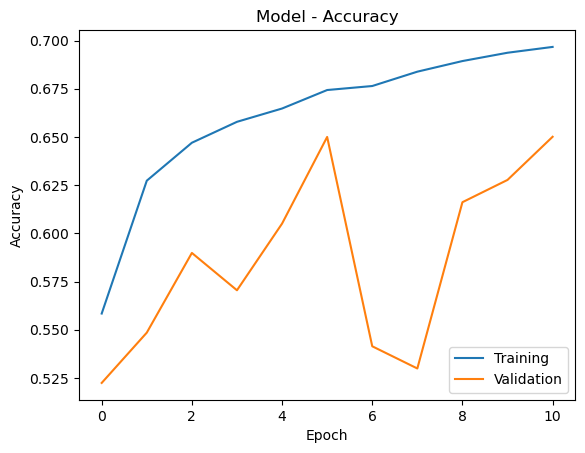

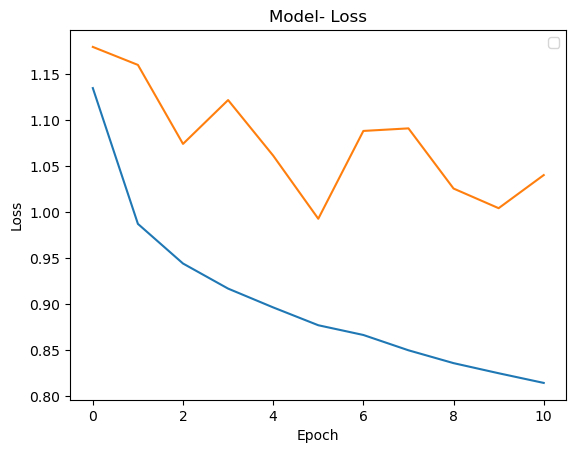

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


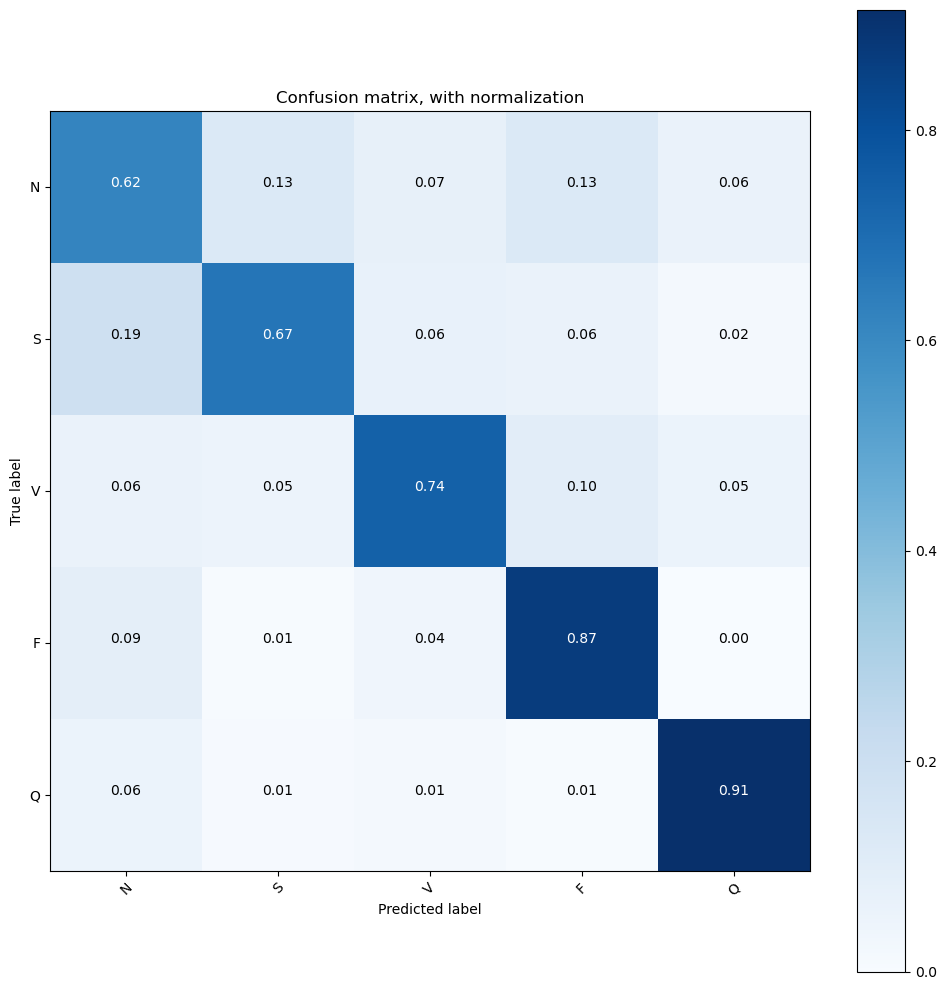

In [29]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()